In [78]:
# !pip install keras
# !pip install tensorflow
import pandas
data = pandas.read_csv('Advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [79]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [80]:
from keras.models import Sequential # it allows you to define a sequential neural model, where layers are added one after another
from keras.layers import Dense # it reps a densely connected layer, which is the most fundamental type of layer in neural networks. it performs a matrix multiplication btwn the input data and the set of weights, followed by an activation function.

In [81]:
array = data.values
X = array[:,:3]
Y = array[:,3]
Y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [82]:
# using model_selection, split X and Y to training and texting sets
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=42)

In [83]:
# creating the neural network
model = Sequential()
# input layer
model.add(Dense(500, input_shape=(3,),activation='relu')) # add() is used to create the layers, 500 is the number of nodes,input_dim is the num of columns we are using in the dataset

# Hidden layers 
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
# output layer
model.add(Dense(1))
# input layer can only be one in sequential model, same goes to output layer but hidden layer can be as many as you want, in Deep learning we encourage as many hidden layers so as to make it a 'deep' learning model

# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()


/home/user/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 500)            │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,751 (233.40 KB)

 Trainable params: 59,751 (233.40 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
# fit our x_train to our model
# evaluate the model's perfomance
model.fit(X_train,Y_train,epochs=500,batch_size=60)
# epoch specifies the number of times the entire training dataset will be passed in our model network. more epoch generally leads to better perfomance
# batch_size defines the batch size during training the model updates its weights after processing each batch

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 325.8741
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38.6573 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.8786 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.1855 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.1401 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7400 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0274 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3409 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5840 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1434 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3209 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4057 
Epoch 13/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6347 
Epoch 14/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2650 
Epoch 15/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4775 
Epoch 16/500

In [85]:
# evaluate the accuracy of our model
score = model.evaluate(X_test,Y_test,verbose=2)


2/2 - 0s - 88ms/step - loss: 1.0216


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Text(0.5, 1.0, 'Actual vs Prediction Sales')

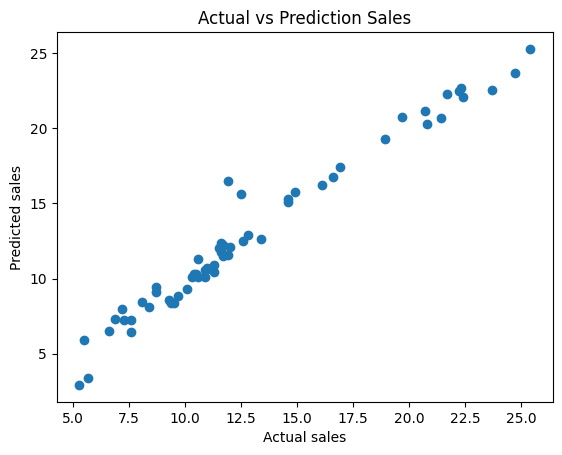

In [86]:
# make prediction
prediction = model.predict(X_test)
# compare predictions with actual values
import matplotlib.pyplot as plt
import seaborn as sns

graph = plt.scatter(Y_test,prediction)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual vs Prediction Sales')

In [87]:
# !pip install ann_visualizer
# !pip install graphviz
# !pip install ann_visualizer graphviz pydot
# using ann_viz, a function library, create a visual of the model
# ann_visualizer helps in generating a graphical representation of the network architecture, showing the layers, the number of neurons in each layer, and the connections between them.
# graphviz provides a way to represent structural information as diagrams of abstract graphs and networks.
# eg file.png


In [89]:

from ann_visualizer.visualize import ann_viz;
#Build your model here
ann_viz(model)

AttributeError: 'Dense' object has no attribute 'input_shape'